# Plot Specific Ionising Luminosity Grid

This example demonstrates how to plot the specific ionising photon luminosity 

In [15]:
import numpy as np
import cmasher as cmr
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from synthesizer.grid import Grid
from synthesizer.plots import plot_log10Q

Let's begin by defining the the grid and its location:

In [16]:

grid_dir =  '../../../tests/test_grid/'
grid_name = 'test_grid'

We can then initialise the grid:

In [17]:
grid = Grid(grid_name, grid_dir=grid_dir)

Let's define the ion we're interested in (at the time of writing only `HI` and `HeII` are computed for grids) and get the grid for that specific ion:

In [18]:
ion = 'HI'
log10Q = grid.log10Q[ion]

Let's define the min and max values we apply to map with the colourbar:

In [19]:
# if no limits supplied set a sensible range for HI ion otherwise use min max
vmin = None
vmax = None

if ion == 'HI':
    if not vmin: vmin = 42.5
    if not vmax: vmax = 47.5
else:
    if not vmin: vmin = np.min(log10Q)
    if not vmax: vmax = np.max(log10Q)


We want to plot a row for every metallicity, which is not typically evenly spaced so let's do that:

In [20]:
y = np.arange(len(grid.metallicity))

Let's choose a suitable colourmap, the hardest part of any project, and define a normalisation function:

In [21]:
cmap = cmr.sapphire
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

Let's now make the figure:

Text(0, 0.5, 'Z')

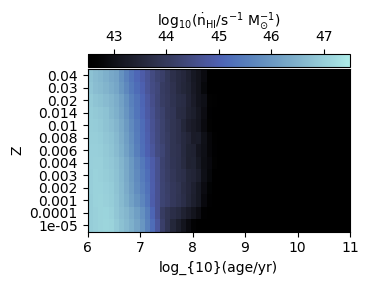

In [23]:
left = 0.2
height = 0.65
bottom = 0.15
width = 0.75
hsize = 3.5
vsize = 2.5

# set up axes
fig = plt.figure(figsize=(hsize, vsize))
ax = fig.add_axes((left, bottom, width, height))
cax = fig.add_axes([left, bottom+height+0.01, width, 0.05])

# make plot
ax.imshow(log10Q.T, origin='lower', extent=[grid.log10age[0],
            grid.log10age[-1], y[0]-0.5, y[-1]+0.5], cmap=cmap,
            aspect='auto', vmin=vmin, vmax=vmax)


cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)
cmapper.set_array([])

# add colourbar
fig.colorbar(cmapper, cax=cax, orientation='horizontal')
cax.xaxis.tick_top()
cax.xaxis.set_label_position('top')
cax.set_xlabel(r'$\rm log_{10}(\dot{n}_{'+ion+'}/s^{-1}\ M_{\odot}^{-1})$')
cax.set_yticks([])

ax.set_yticks(y, grid.metallicity)
ax.minorticks_off()
ax.set_xlabel('log_{10}(age/yr)')
ax.set_ylabel('Z')

